# Imports

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, math

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("titanic_augmented.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,title,title_group,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr,Mr,2,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs,Mrs,2,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss,Miss,1,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Mrs,Mrs,2,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Mr,Mr,1,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  name_length        891 non-null    int64  
 13  title              891 non-null    object 
 14  title_group        891 non-null    object 
 15  family_size        891 non-null    int64  
 16  is_alone           891 non

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,1.904602,0.602694,1.787879,17.789001,1.572536,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,1.613459,0.489615,1.361142,21.218127,1.661773,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,1.000000,0.000000,1.000000,7.762500,0.116026,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,1.000000,1.000000,1.000000,8.850000,1.175795,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,2.000000,1.000000,2.000000,24.288000,2.543045,77.25000,7.493131e+07,757663.000000,7.479345,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,11.000000,1.000000,7.000000,221.779000,9.779559,148.00000,9.997588e+07,999684.000000,9.997177,14.000000


# Exploratory Data Analysis

In [6]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
num_cols

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'name_length',
 'family_size',
 'is_alone',
 'ticket_group_size',
 'fare_per_person',
 'age_fare_ratio',
 'cabin_room_number',
 'booking_reference',
 'service_id',
 'cabin_score',
 'name_word_count']

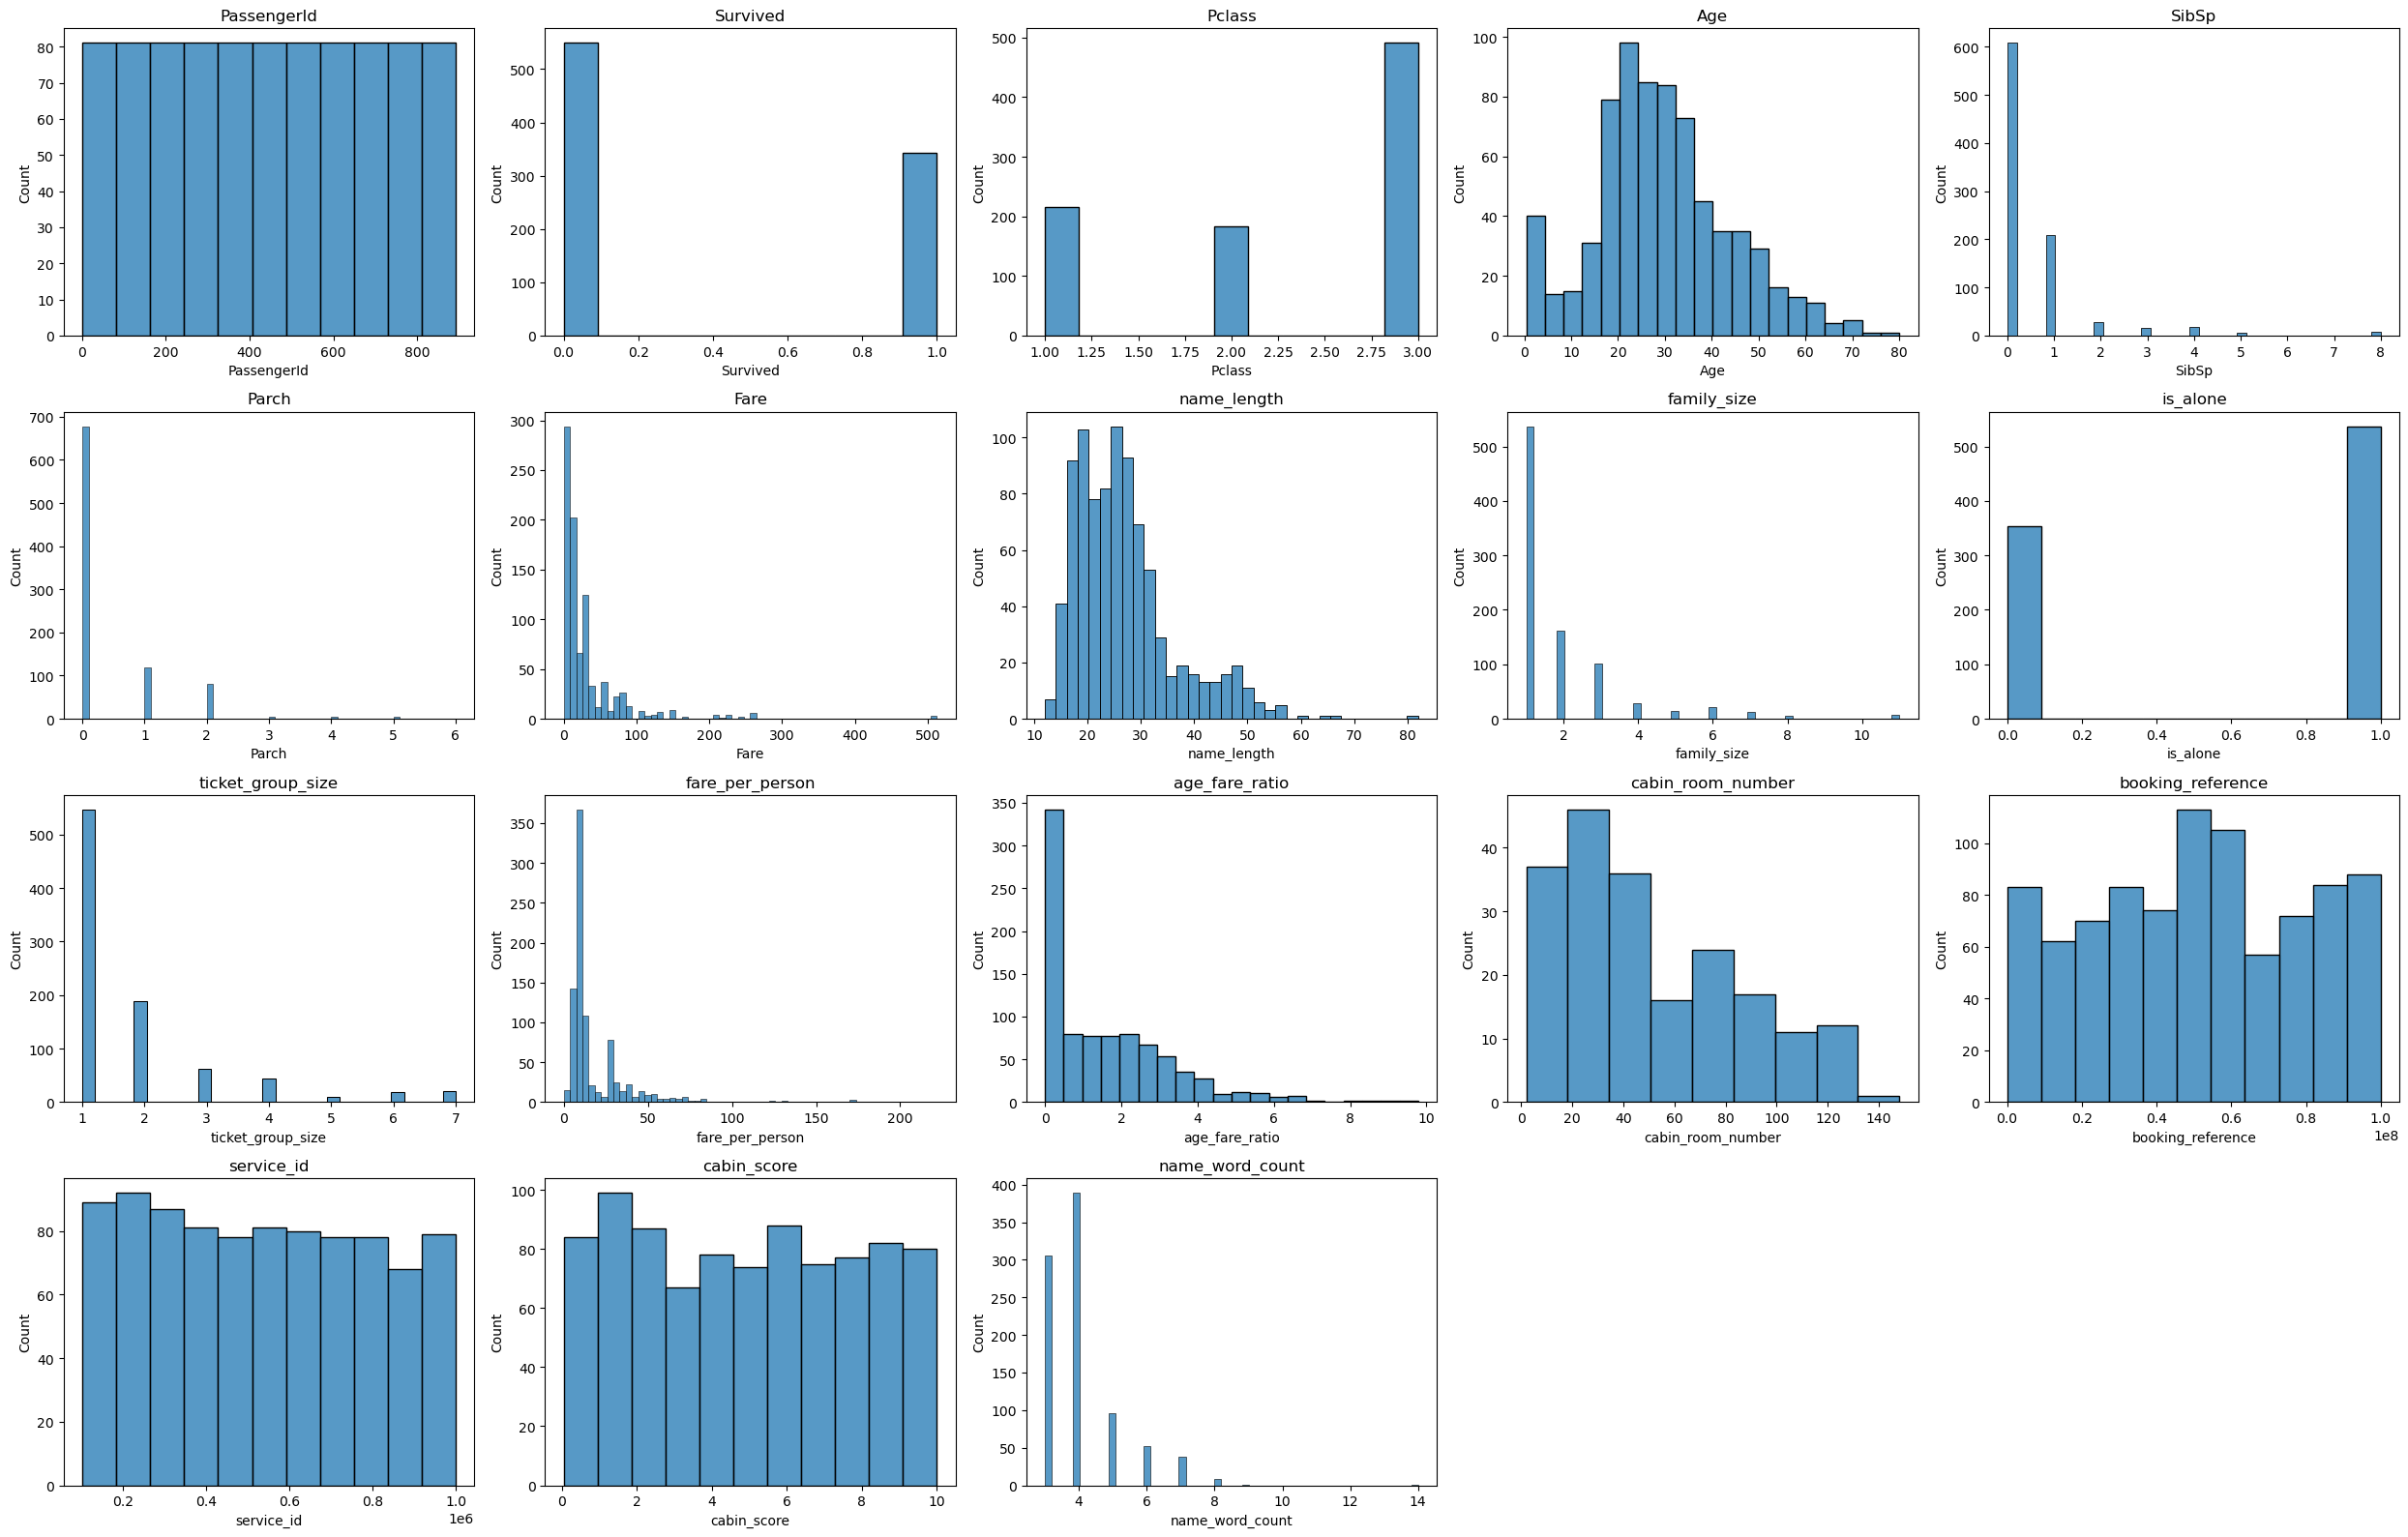

In [7]:
n_cols = 5
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
# unique values in each column
df.nunique()

PassengerId          891
Survived               2
Pclass                 3
Name                 891
Sex                    2
Age                   88
SibSp                  7
Parch                  7
Ticket               681
Fare                 248
Cabin                147
Embarked               3
name_length           50
title                 17
title_group            5
family_size            9
is_alone               2
ticket_group_size      7
fare_per_person      245
age_fare_ratio       615
cabin_deck             9
cabin_room_number     92
booking_reference    681
service_id           891
cabin_score          891
name_word_count        8
dtype: int64

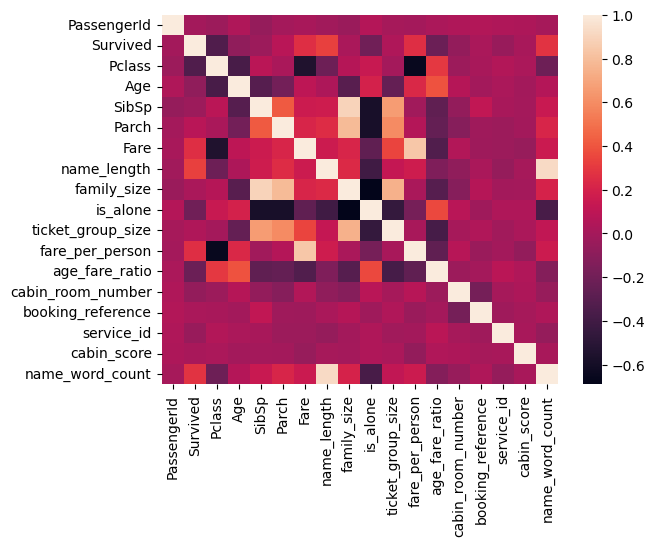

In [9]:
# correlation matrix
corr = df[num_cols].corr()
sns.heatmap(corr)
plt.show()

In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == 'str']
cat_cols

[]

In [11]:
# change categorical columns to object type
for col in cat_cols:
    df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  name_length        891 non-null    int64  
 13  title              891 non-null    object 
 14  title_group        891 non-null    object 
 15  family_size        891 non-null    int64  
 16  is_alone           891 non

In [12]:
# unique values in each column
for col in cat_cols:
    print(col, df[col].unique())

In [13]:
# change Unknown to NA
df['cabin_deck'] = df['cabin_deck'].replace('Unknown', np.nan)

In [14]:
# extract only letter for cabin
df['cabin_deck'] = df['cabin_deck'].str[0]
df['cabin_deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [15]:
# change 'T' and 'F' to NA
df['cabin_deck'] = df['cabin_deck'].replace(['T', 'F'], np.nan)
df['cabin_deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B'], dtype=object)

# Data Processing

In [16]:
# drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'name_length', 'Ticket', 'title', 'name_word_count', 'service_id', 'booking_reference'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title_group,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,cabin_score
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,2,0,1,7.250,3.034483,NaN,NaN,6.134152
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,2,0,1,71.283,0.533084,C,85.0,4.182430
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,1,1,1,7.925,3.280757,NaN,NaN,9.327285
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,2,0,2,26.550,0.659134,C,123.0,8.660639
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,1,1,1,8.050,4.347826,NaN,NaN,0.452187


In [17]:
# missing values
df.isna().sum()

Survived               0
Pclass                 0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Fare                   0
Cabin                687
Embarked               2
title_group            0
family_size            0
is_alone               0
ticket_group_size      0
fare_per_person        0
age_fare_ratio         0
cabin_deck           701
cabin_room_number    691
cabin_score            0
dtype: int64

In [18]:
# drop cabin related info
df = df.drop(['Cabin', 'cabin_deck', 'cabin_room_number'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_group,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,0,1,7.250,3.034483,6.134152
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,1,71.283,0.533084,4.182430
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1,1,7.925,3.280757,9.327285
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0,2,26.550,0.659134,8.660639
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1,1,8.050,4.347826,0.452187


In [19]:
# NOTE: Avoid data leakage by NOT fitting imputers on the full dataset.
# Missing values will be handled inside model Pipelines (fit on training folds only).
df.isna().sum()


Survived               0
Pclass                 0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Fare                   0
Embarked               2
title_group            0
family_size            0
is_alone               0
ticket_group_size      0
fare_per_person        0
age_fare_ratio         0
cabin_score            0
dtype: int64

In [20]:
# Do not drop rows globally (to avoid changing data distribution unnecessarily).
# Keep as-is; Pipelines will impute missing values.
df.shape


(891, 15)

# Data Splitting

In [22]:
y = df['Survived']
X = df.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_group,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score
0,3,male,22.0,1,0,7.2500,S,Mr,2,0,1,7.250,3.034483,6.134152
1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,1,71.283,0.533084,4.182430
2,3,female,26.0,0,0,7.9250,S,Miss,1,1,1,7.925,3.280757,9.327285
3,1,female,35.0,1,0,53.1000,S,Mrs,2,0,2,26.550,0.659134,8.660639
4,3,male,35.0,0,0,8.0500,S,Mr,1,1,1,8.050,4.347826,0.452187


In [23]:
from sklearn.model_selection import train_test_split

# Required split: 75% train / 25% test, stratified by target, seed=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [24]:
num_cols = ['Age', 'Fare', 'fare_per_person', 'age_fare_ratio', 'cabin_score']
cat_cols = ['Sex', 'Embarked', 'title_group']
ord_cols = ['Pclass', 'SibSp', 'Parch', 'family_size', 'ticket_group_size']

# Modelling

In [30]:
from sklearn.preprocessing import OrdinalEncoder

pclass_ord = [1, 2, 3]
sibsp_ord = [0, 1, 2, 3, 4, 5, 6, 7, 8]
parch_ord = [0, 1, 2, 3, 4, 5, 6, 7, 8]
familysize_ord = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ticketgroupsize_ord = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

ordinal_encoder = OrdinalEncoder(categories=[pclass_ord, sibsp_ord, parch_ord, familysize_ord, ticketgroupsize_ord])

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer

# Numerical: impute -> scale
num_transformer = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler()),
])

# Ordinal: impute -> ordinal encode
ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", ordinal_encoder),
])

# Categorical (one-hot): impute -> one-hot
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("ord", ord_transformer, ord_cols),
        ("cat", cat_transformer, cat_cols),
    ],
    remainder="drop"
)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = [
    ("LogisticRegression", LogisticRegression(max_iter=2000, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("RandomForest", RandomForestClassifier(random_state=42)),
]

for name, model in models:
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model),
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
    print(f"{name} CV accuracy: {scores.mean():.4f} (std={scores.std():.4f})")


LogisticRegression CV accuracy: 0.8218 (std=0.0091)
KNN CV accuracy: 0.7948 (std=0.0259)
RandomForest CV accuracy: 0.8129 (std=0.0237)


KNN
Best parameters: {'model__n_neighbors': 11, 'model__weights': 'uniform'}
Best CV score: 0.8053
Test accuracy: 0.7937


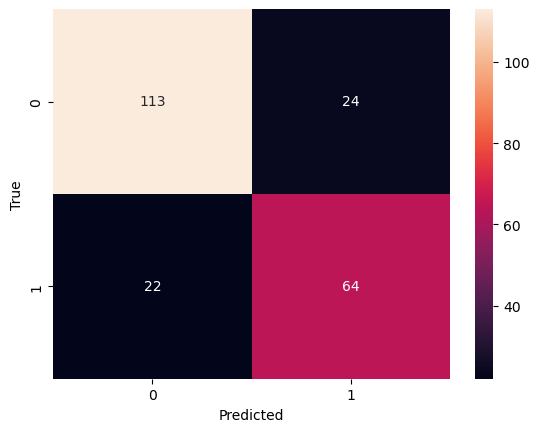

In [34]:
# hyperparameter tuning (train only) + single held-out test evaluation
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# KNN
print("KNN")
knn_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier())
])

knn_param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11],
    "model__weights": ["uniform", "distance"],
}

gs_knn = GridSearchCV(
    knn_pipe,
    knn_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

gs_knn.fit(X_train, y_train)
print(f"Best parameters: {gs_knn.best_params_}")
print(f"Best CV score: {gs_knn.best_score_:.4f}")

# TEST (evaluate once)
y_pred = gs_knn.best_estimator_.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Random Forest
Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
Best CV score: 0.8308
Test accuracy: 0.7982


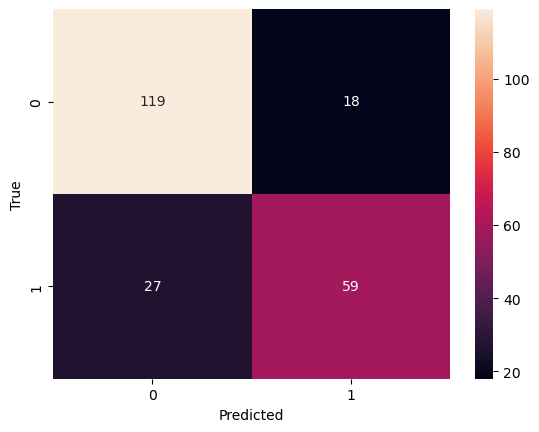

In [35]:
# random forest (train only) + single held-out test evaluation
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Random Forest")
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 2, 5],
}

gs_rf = GridSearchCV(
    rf_pipe,
    rf_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

gs_rf.fit(X_train, y_train)
best_params = gs_rf.best_params_
print(f"Best parameters: {best_params}")
print(f"Best CV score: {gs_rf.best_score_:.4f}")

# TEST (evaluate once)
y_pred = gs_rf.best_estimator_.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


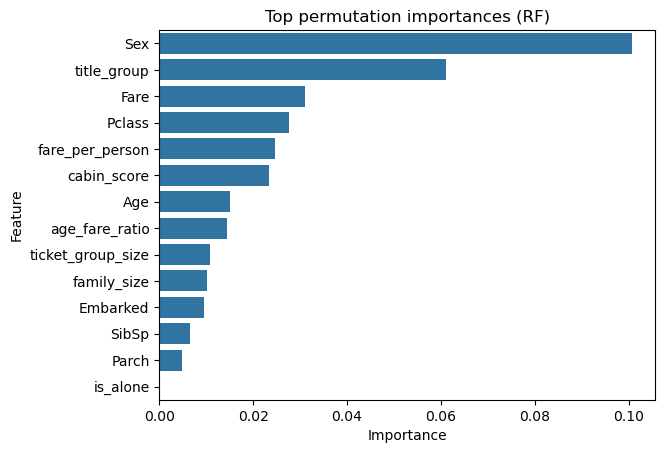

In [46]:
# feature importance (leakage-safe): permutation importance on a validation split from training set
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Create an inner validation set from training data (no test leakage)
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(
    X_train, y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

# Fit best RF (from gs_rf) on X_tr2 only
best_rf_model = gs_rf.best_estimator_
best_rf_model.fit(X_tr2, y_tr2)

# Permutation importance evaluated on X_val2
pi = permutation_importance(
    best_rf_model,
    X_val2,
    y_val2,
    n_repeats=10,
    random_state=42,
    scoring="accuracy",
    n_jobs=-1
)

importance_series = pd.Series(pi.importances_mean, index=X_val2.columns).sort_values(ascending=False)
sorted_features = list(importance_series.items())

importance_df = importance_series.reset_index()
importance_df.columns = ["Feature", "Importance"]

sns.barplot(x="Importance", y="Feature", data=importance_df.head(20))
plt.title("Top permutation importances (RF)")
plt.show()


# Final model

In [37]:
# select only top 7 features (based on permutation importance)
selected_features = [feature for feature, _ in sorted_features[:7]]
selected_features


['Sex',
 'title_group',
 'Fare',
 'Pclass',
 'fare_per_person',
 'cabin_score',
 'Age']

In [38]:
num_cols = ['Age', 'fare_per_person']
cat_cols = ['Sex']
ord_cols = ['Pclass', 'SibSp', 'Parch', 'ticket_group_size']

In [39]:
from sklearn.preprocessing import OrdinalEncoder

pclass_ord = [1, 2, 3]
sibsp_ord = [0, 1, 2, 3, 4, 5, 6, 7, 8]
parch_ord = [0, 1, 2, 3, 4, 5, 6, 7, 8]
ticketgroupsize_ord = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

ordinal_encoder = OrdinalEncoder(categories=[pclass_ord, sibsp_ord, parch_ord, ticketgroupsize_ord])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Subset data to top-7
X_train_small = X_train[selected_features].copy()
X_test_small = X_test[selected_features].copy()

# 2) Build a preprocessor that matches ONLY the top-7 columns
num_cols_small = X_train_small.select_dtypes(include=["number"]).columns.tolist()
cat_cols_small = [c for c in X_train_small.columns if c not in num_cols_small]

preprocessor_small = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), num_cols_small),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols_small),
    ],
    remainder="drop"
)

# 3) Extract tuned RF params
# - If you already have gs_rf, this is the most reliable:
rf_params = {k.replace("model__", ""): v for k, v in gs_rf.best_params_.items() if k.startswith("model__")}

# (If you don't have gs_rf but have best_params dict, keep your original line)
# rf_params = {k.replace("model__", ""): v for k, v in best_params.items() if k.startswith("model__")}

# 4) Train + evaluate once on test
final_small_model = Pipeline(steps=[
    ("preprocess", preprocessor_small),
    ("model", RandomForestClassifier(random_state=42, **rf_params)),
])

final_small_model.fit(X_train_small, y_train)
y_pred = final_small_model.predict(X_test_small)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Accuracy: 0.8117


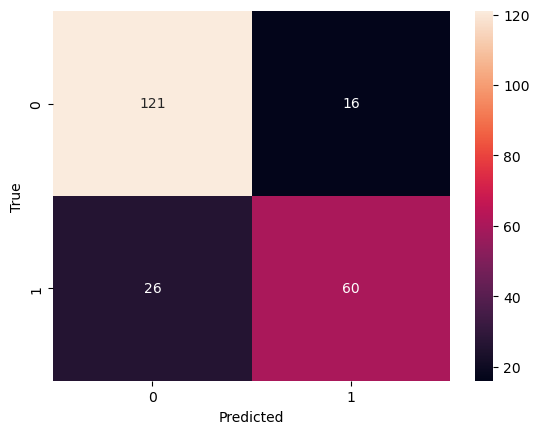

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Subset data to top-7
X_train_small = X_train[selected_features].copy()
X_test_small = X_test[selected_features].copy()

# 2) Build a preprocessor that matches ONLY the top-7 columns
num_cols_small = X_train_small.select_dtypes(include=["number"]).columns.tolist()
cat_cols_small = [c for c in X_train_small.columns if c not in num_cols_small]

preprocessor_small = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), num_cols_small),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols_small),
    ],
    remainder="drop"
)

# 3) Extract tuned RF params
# - If you already have gs_rf, this is the most reliable:
rf_params = {k.replace("model__", ""): v for k, v in gs_rf.best_params_.items() if k.startswith("model__")}

# (If you don't have gs_rf but have best_params dict, keep your original line)
# rf_params = {k.replace("model__", ""): v for k, v in best_params.items() if k.startswith("model__")}

# 4) Train + evaluate once on test
final_small_model = Pipeline(steps=[
    ("preprocess", preprocessor_small),
    ("model", RandomForestClassifier(random_state=42, **rf_params)),
])

final_small_model.fit(X_train_small, y_train)
y_pred = final_small_model.predict(X_test_small)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
